Assignment 3

Spacy and Web Scraping Assignment

Task 1 Download the text file owlcreek.txt and read it into a variable named owlcreek

In [1]:
import os

In [4]:
os.chdir("C:\\Users\\91706\\Downloads")

In [7]:
with open('owlcreek.txt','r') as f:
    owlcreek = f.read()
    

Task 2
Import Spacy and load the 'en_core_web_sm' into a variable named nlp

In [10]:
import spacy

In [11]:
nlp = spacy.load('en_core_web_sm')

Task 3
Create a Doc object from the text file loaded into owlcreek and then print the first 50 characters.

In [12]:
doc = nlp(owlcreek)

In [19]:
doc.text[:50]

'AN OCCURRENCE AT OWL CREEK BRIDGE\n\nby Ambrose Bier'

Task 4
How many tokens are contained in the file ?

In [20]:
len(doc)

4835

Task 5
How many sentences are contained in the file?

In [30]:
l1 = (list(doc.sents))

In [31]:
len(l1)

217

Task 6 Print the fourth sentence in the document ?

In [34]:
print(l1[3])

The man's hands were behind
his back, the wrists bound with a cord.  


Task 7
For each token in the sentence above, print its text, POS tag, the fine-grained tag , lemma and description of the fine-grained tag

In [53]:
sentence = l1[3]
for token in sentence:
    print(f'{token.text:{10}} {token.pos_:{10}} {token.tag_:{8}} {token.lemma_:{10}} {spacy.explain(token.tag_)}')

The        DET        DT       the        determiner
man        NOUN       NN       man        noun, singular or mass
's         PART       POS      's         possessive ending
hands      NOUN       NNS      hand       noun, plural
were       AUX        VBD      be         verb, past tense
behind     ADP        IN       behind     conjunction, subordinating or preposition

          SPACE      _SP      
          None
his        PRON       PRP$     -PRON-     pronoun, possessive
back       NOUN       NN       back       noun, singular or mass
,          PUNCT      ,        ,          punctuation mark, comma
the        DET        DT       the        determiner
wrists     NOUN       NNS      wrist      noun, plural
bound      VERB       VBN      bind       verb, past participle
with       ADP        IN       with       conjunction, subordinating or preposition
a          DET        DT       a          determiner
cord       NOUN       NN       cord       noun, singular or mass
.         

Task 8
Provide a frequency count list of POS tags from the entire document

In [92]:
pos_counts = doc.count_by(spacy.attrs.POS)

In [75]:
for k,v in sorted(pos_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

84. ADJ  : 259
85. ADP  : 468
86. ADV  : 192
87. AUX  : 219
89. CCONJ: 129
90. DET  : 550
91. INTJ : 3
92. NOUN : 842
93. NUM  : 28
94. PART : 58
95. PRON : 425
96. PROPN: 68
97. PUNCT: 571
98. SCONJ: 84
100. VERB : 464
103. SPACE: 475


Task 9
What percentage of tokens are nouns?

In [103]:
doc.vocab[92].text

'NOUN'

In [93]:
s1 =sum(pos_counts.values())

In [105]:
num = pos_counts[92]

In [106]:
print((num/s1)*100)

17.414684591520167


Task 10
Show the first ten named entities from the doc



In [111]:
for ent in doc.ents[:10]:
    print(ent.text+' - '+ent.label_+' - ' + str(spacy.explain(ent.label_)) )

OWL - ORG - Companies, agencies, institutions, etc.
Ambrose Bierce

 - ORG - Companies, agencies, institutions, etc.
Alabama - GPE - Countries, cities, states
twenty feet - QUANTITY - Measurements, as of weight or distance
two - CARDINAL - Numerals that do not fall under another type
two - CARDINAL - Numerals that do not fall under another type
two - CARDINAL - Numerals that do not fall under another type
a hundred yards - QUANTITY - Measurements, as of weight or distance
four - CARDINAL - Numerals that do not fall under another type
thirty-five years of age - DATE - Absolute or relative dates or periods


Task 11 Display the Dependency Parse for the third sentence

In [112]:
sen = l1[2]

In [114]:
for token in sen:
    print(token.dep_)

det
nsubj
ROOT
prep
det
compound
pobj
prep
amod
pobj
punct
advcl
prt

prep
det
amod
pobj
nummod
npadvmod
advmod
punct



Web Scraping Assignment

Task 12
Import requests, Beautiful Soup and create a variable url and assign it 'https://www.analyticsvidhya.com/blog/2019/'

In [51]:
import requests

In [52]:
from bs4 import BeautifulSoup

In [81]:
web_page = requests.get('https://www.analyticsvidhya.com/blog/2019/')

Task 13
using the requests library make a request using the url and check the status code of it

In [82]:
web_page

<Response [200]>

Task 14
Now create a soup object using BeautifulSoup and pass in the content of the requests object

In [83]:
soup = BeautifulSoup(web_page.content,'html.parser')

Task 15
Extract all the links and titles of the Articles and then save it into a Dataframe. After creating a dataframe print its head.

In [85]:
article = soup.find('div', class_='row block-streams el-module-3')

In [87]:
title_list = []
link_list = []
for data in soup.find_all('h3'):
    try:
        title = data.a.text
        link = data.a['href']
        title_list.append(title)
        link_list.append(link)
        
    except:
        pass


In [88]:
import pandas as pd

In [89]:
df1 = pd.DataFrame(data = {'Title':title_list,'Link':link_list}) 

In [90]:
df1.head()

,Title,Link
0,\n5 Key Reasons Why Data Scientists Are Quitti...,https://www.analyticsvidhya.com/blog/2019/12/5...
1,\n5 Weird and Hilarious Uses of Data Science,https://www.analyticsvidhya.com/blog/2019/12/f...
2,\n2019 In-Review and Trends for 2020 – A Techn...,https://www.analyticsvidhya.com/blog/2019/12/2...
3,\n30 Challenging Open Source Data Science Proj...,https://www.analyticsvidhya.com/blog/2019/12/3...
4,\n20 Most Popular Machine Learning and Deep Le...,https://www.analyticsvidhya.com/blog/2019/12/2...


Task 16
Now we just scraped for page 1 there are total 14 pages, Now I want you to navigate over each page scrape title and links for the same.

In [159]:
title_list_all = []
link_list_all = []
link_jumper = 'https://www.analyticsvidhya.com/blog/2019/'
i = 0
while i < 14:
    web_page = requests.get(link_jumper)
    soup = BeautifulSoup(web_page.content,'html.parser')
    for data in soup.find_all('h3'):
        try:
            title = data.a.text
            link = data.a['href']
            title_list_all.append(title)
            link_list_all.append(link)

        except:
            pass
    jump_next = soup.find(class_ = 'next')
    link_jumper = jump_next['href']
    i += 1
    print(i,'done')


1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done


Task 17
Drop the duplicates and Print the shape of the dataframe

In [151]:
titles_wo_dup = []
title_list_all = [titles_wo_dup.append(x) for x in title_list_all if x not in titles_wo_dup]

In [149]:
links_wo_dup = []
link_list_all = [links_wo_dup.append(x) for x in link_list_all if x not in links_wo_dup]

In [153]:
len(titles_wo_dup)

144

In [154]:
len(links_wo_dup)

144

In [280]:
df1 = pd.DataFrame(data = {'Title':titles_wo_dup,'Link':links_wo_dup}) 

In [283]:
df1.shape

(144, 2)

Task 18
Now that we have links to all the articles publised in 2019 lets now get its content.

Iterate over each link, extract the content ( div with class="main-content") and append it to the new column in articles_df

In [433]:
lst = []
for x in links_wo_dup:
    page = requests.get(x)
    soup = BeautifulSoup(page.content,'html.parser')
    article = soup.find('div', class_= "main-content")
    p = article.contents
    lst.append(p)

In [477]:
df1['content'] = lst

In [478]:
df1

,Title,Link,content
0,\n5 Key Reasons Why Data Scientists Are Quitti...,https://www.analyticsvidhya.com/blog/2019/12/5...,"[ , <div class=""maha-crumbs""><span><span><a hr..."
1,\n5 Weird and Hilarious Uses of Data Science,https://www.analyticsvidhya.com/blog/2019/12/f...,"[ , <div class=""maha-crumbs""><span><span><a hr..."
2,\n2019 In-Review and Trends for 2020 – A Techn...,https://www.analyticsvidhya.com/blog/2019/12/2...,"[ , <div class=""maha-crumbs""><span><span><a hr..."
3,\n30 Challenging Open Source Data Science Proj...,https://www.analyticsvidhya.com/blog/2019/12/3...,"[ , <div class=""maha-crumbs""><span><span><a hr..."
4,\n20 Most Popular Machine Learning and Deep Le...,https://www.analyticsvidhya.com/blog/2019/12/2...,"[ , <div class=""maha-crumbs""><span><span><a hr..."
5,\nDecoding the Best Machine Learning Papers fr...,https://www.analyticsvidhya.com/blog/2019/12/n...,"[ , <div class=""maha-crumbs""><span><span><a hr..."
6,\nAn Exhaustive Guide to Detecting and Fightin...,https://www.analyticsvidhya.com/blog/2019/12/d...,"[ , <div class=""maha-crumbs""><span><span><a hr..."
7,\nHow to use a Machine Learning Model to Make ...,https://www.analyticsvidhya.com/blog/2019/12/s...,"[ , <div class=""maha-crumbs""><span><span><a hr..."
8,\n10 Exciting Real-World Applications of AI in...,https://www.analyticsvidhya.com/blog/2019/12/1...,"[ , <div class=""maha-crumbs""><span><span><a hr..."
9,\nGame Theory 101: Decision Making in a Compet...,https://www.analyticsvidhya.com/blog/2019/12/g...,"[ , <div class=""maha-crumbs""><span><span><a hr..."


Task 19
We have all the content now, Lets clean it

Remove all the html tags from the contents and print the first five rows of it.

In [170]:
!pip install html2text

In [171]:
import html2text

In [479]:
i = 0
for x in articles_df['content']:
    df1.at[i,'content'] = html2text.html2text(str(x))
    i += 1

Task 20
Still some links will show up, so now split it on \n\n and remove all the elements with links in it.

In [414]:
import re

In [480]:
i = 0
for x in df1['content']:
    check = x.split('\n\n')
    copy_list = check.copy()
    for y in check:
         if re.search(r'''http[s|:]''',y):
            copy_list.remove(y)
    df1.at[i,'content'] = copy_list
    i += 1

Task 21
Join all the contents in using '\n\n' and make it a single string again.

In [481]:
i = 0
for x in df1['content']:
    new = '\n\n'.join(x)
    df1.at[i,'content'] = new
    i += 1

Task 22
Replace all \n and \t with space.

In [484]:
i = 0
for x in df1['content']:
    for y in x:
        if y == '\t' or y == '\n':
            x = x.replace(y," ")
    df1.at[i,'content'] = x
    i += 1

Task 23
Remove all the punctuation from the text.

In [485]:
i = 0
for x in df1['content']:
    y = re.sub(r"[^a-zA-Z0-9]", " ", x)
    df1.at[i,'content'] = y
    i += 1

Task 24
Lowercase the whole content columns.

In [503]:
i = 0
for x in df1['content']:
    y = x.lower()
    df1.at[i,'content'] = y
    i += 1

Task 25
Tokenise the whole content column

In [505]:
import nltk

In [506]:
from nltk import word_tokenize

In [509]:
i = 0
for text in df1['content']:
    word_token = word_tokenize(text)
    df1.at[i,'content'] = word_token
    i += 1

Task 26
Remove all the stopwords from the content.

In [516]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
i = 0
for x in df1['content']:
    temp_list = []
    for word in x:
        if word not in stop:
            temp_list.append(word)
    df1.at[i,'content'] = temp_list
    i += 1
            
        

Task 27
Remove all the words containing numbers.

In [532]:
i = 0
for x in df1['content']:
    temp_list = []
    for word in x:
        if word.isalpha():
            temp_list.append(word)
    df1.at[i,'content'] = temp_list
    i += 1

Task 28
Create a vocab appending all the rows and print its length.

In [541]:
vocab = []
for x in df1['content']:
    for y in x:
        vocab.append(y)

Task 29
Build a word cloud of the vocab

In [547]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [551]:
stopwords = set(STOPWORDS)
words = " ".join(vocab)

In [585]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 

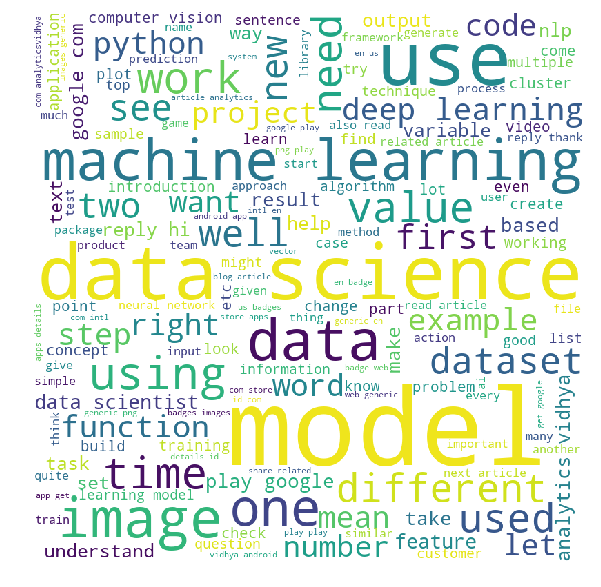

In [586]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 